# 76. Model Performans Analizi

Hassasiyet(Accuracy):Doğru tahmin edilen verilerin oranı(Doğruveri/Toplamveri)

**Modelin hassasiyeti nasıl belirlenir ?**

- fit() kullanılabilir.
    - Eğitim verisi, **KESİNLİKLE KULLANIL<u>MAMA</u>LIDIR**
    - Test veri seti kullanılmalıdır.

In [40]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

iris = datasets.load_iris()
x = iris.data
y = iris.target
veri = pd.DataFrame(x, columns = iris.feature_names)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30,
                                                    random_state = 100, 
                                                    stratify = y)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
accuracy = knn.predict(x_test)
print(accuracy)
knn.score(x_test, y_test)


[0 1 2 1 2 0 1 0 0 0 1 1 1 0 1 2 2 2 1 1 2 1 1 2 1 0 2 1 0 2 2 2 2 0 2 2 0
 0 0 1 0 0 0 1 2]


1.0

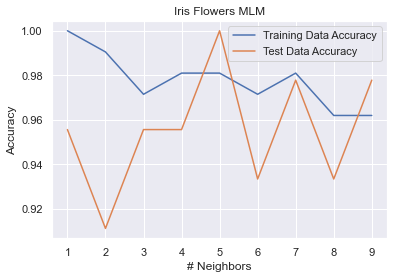

In [38]:
# Performansı grafik ile analiz etmek.
neighbors = np.arange(1,10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)


plt.plot(neighbors, train_accuracy, label = 'Training Data Accuracy')
plt.plot(neighbors, test_accuracy, label = 'Test Data Accuracy')
plt.title('Iris Flowers MLM')
plt.legend()
plt.xlabel('# Neighbors')
plt.ylabel('Accuracy')
plt.show()